# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [4]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [5]:
da.DMDMARTL.unique()

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [6]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",5:"Never married", 6: "Living with partner", 77: "Refused",np.nan:"Missing"})

In [7]:
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [8]:
da[da.RIAGENDR == 2].DMDMARTLx.value_counts() #Female

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [9]:
da[da.RIAGENDR == 1].DMDMARTLx.value_counts() # Male

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [10]:
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <=40)].DMDMARTLx.value_counts() # Overall 30 -40 Years old

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTLx, dtype: int64

In [11]:
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <=40)][da.RIAGENDR == 2].DMDMARTLx.value_counts() # Females 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTLx, dtype: int64

In [12]:
da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <=40)][da.RIAGENDR == 1].DMDMARTLx.value_counts() # Males 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: DMDMARTLx, dtype: int64

In [13]:
da[da.RIAGENDR == 1].DMDMARTLx.value_counts() # Males 

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

more men are living with partners and less divorced than females

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

30-40 : More women are living with partners than overall population.

__Q1c.__ Repeat part b for the men.

More men missing in overall population and none in 30-40 men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [14]:
da["agegrp"] = pd.cut(da.RIDAGEYR,[0,10,20,30,40,50,60,70,80]) # Create Strata

In [15]:
x = da[da.RIAGENDR == 2].agegrp.value_counts()
x / x.sum()

(20, 30]    0.172715
(40, 50]    0.168683
(30, 40]    0.159274
(50, 60]    0.157930
(60, 70]    0.148185
(70, 80]    0.137769
(10, 20]    0.055444
(0, 10]     0.000000
Name: agegrp, dtype: float64

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

Females are similarly distributed from 20 - 80, very few from 0 - 10

__Q2b.__ Repeat the construction for males.

In [16]:
x = da[da.RIAGENDR == 1].agegrp.value_counts()
x / x.sum()

(30, 40]    0.166002
(50, 60]    0.164552
(60, 70]    0.158391
(20, 30]    0.156578
(70, 80]    0.145705
(40, 50]    0.145343
(10, 20]    0.063429
(0, 10]     0.000000
Name: agegrp, dtype: float64

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

Almost similar

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [17]:
import math

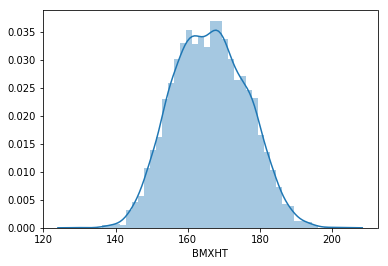

In [18]:
sns.distplot(da.BMXHT.dropna())

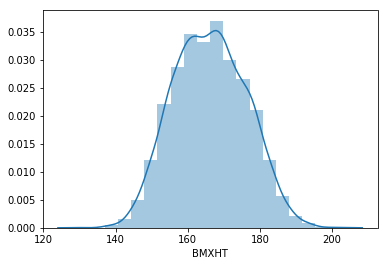

In [19]:
sns.distplot(da.BMXHT.dropna(),bins=20)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

Larger no. of bins, fit the correct density function. The default argument seems correct. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

Text(0.5,1,'Female')

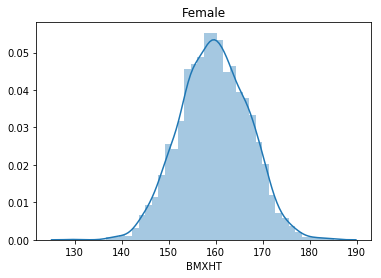

In [20]:
sns.distplot(da[da.RIAGENDR==2].BMXHT.dropna()).set_title('Female')

Text(0.5,1,'Male')

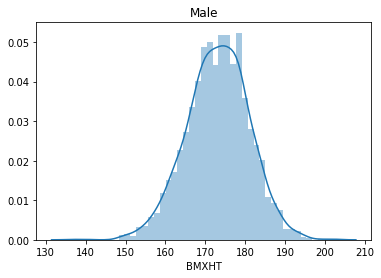

In [21]:
sns.distplot(da[da.RIAGENDR==1].BMXHT.dropna()).set_title('Male')

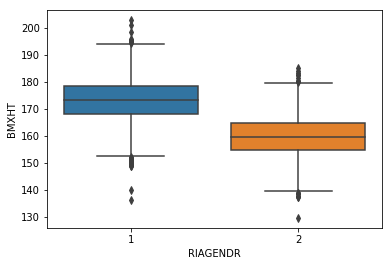

In [22]:
sns.boxplot(x='RIAGENDR', y='BMXHT', data=da)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

The distribution of the data, both slightly skewed towards the left. The median and the percentiles along with the outliers are easier to see in the box plots. 

__Q3d.__ Make a histogram of the log-transformed heights.

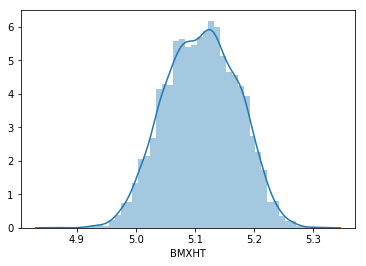

In [23]:
sns.distplot(np.log(da.BMXHT.dropna()))

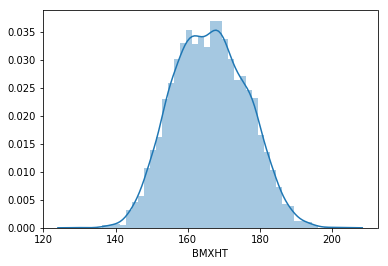

In [24]:
sns.distplot(da.BMXHT.dropna())

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

Both follow the same distribution. (Shape)

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

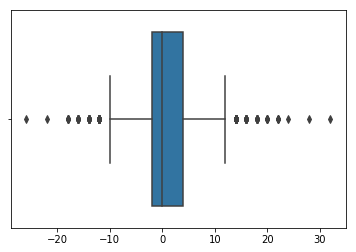

In [25]:
sns.boxplot(da.BPXSY1 - da.BPXSY2)

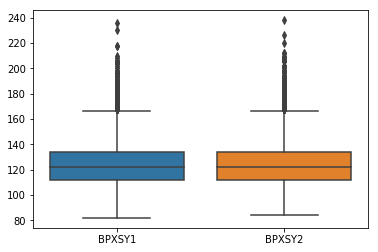

In [26]:
sns.boxplot(data= da.loc[:,['BPXSY1','BPXSY2']])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [28]:
#25

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

 Both look the same distributoon. The variation shows median of 0

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [29]:
# In doing this, it is easier to interpret the results if we pivot the education levels into the columns, and normalize the counts so that they sum to 1.
dx = da.loc[~da.DMDEDUC2.isnull(), :] 
dx = dx.groupby(by=['DMDEDUC2'])['DMDHHSIZ'].value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(),axis=1)
print(dx.to_string(float_format="%.3f")) 


DMDHHSIZ     1     2     3     4     5     6     7
DMDEDUC2                                          
1.0      0.110 0.224 0.147 0.133 0.148 0.108 0.130
2.0      0.117 0.222 0.163 0.152 0.146 0.114 0.086
3.0      0.153 0.271 0.171 0.162 0.110 0.066 0.068
4.0      0.151 0.269 0.193 0.169 0.122 0.051 0.045
5.0      0.143 0.348 0.194 0.165 0.095 0.029 0.026
9.0        NaN 0.667   NaN   NaN 0.333   NaN   NaN


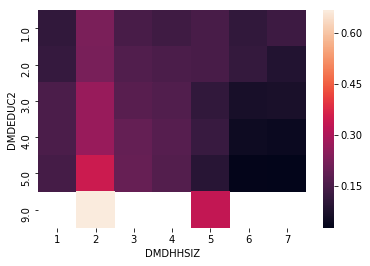

In [30]:
sns.heatmap(dx)

__Q5a.__ Comment on any major differences among the distributions.

College graduates have more proportions with 2 households. While less then 9th Grade belonged  a higher households.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [ ]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.